<h3 style ="color:#00FFFF">Project : Predicting Stock Prices </h3>

<b>Objective : </b>
- Building a model to predict future stock prices based on historical data.


<b>Collection of Dataset :</b>

- This dataset collected for regression project number 10(predicting stocl prices).This is a real life historical data collected.The stock price id of company "Microsoft Corporation"

- The historical data was collected from the website https://www.marketwatch.com/ and searched stock of Microsoft Corporation  named as 'MSFT' and downloaded the historical data.

<h3 style ="color:#00FFFF">Linear Regression : </h3>
- Linear regression is a suprevised learning algorithm to predict the outcome of a continuous variable.

- Linear regression uses the linear equation formula : y = m * x + c

In [29]:
import pandas as pd
import yfinance as yf
import numpy as np 
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

<h5 style="color:White"><b>Loading the Data</b><h4>

In [22]:
stock = pd.read_csv("MSFT.csv")
stock.head()

,Date,Open,High,Low,Close,Volume
0,12/31/2024,426.10,426.73,420.66,421.50,"13,246,510"
1,12/30/2024,426.06,427.55,421.90,424.83,"13,158,700"
2,12/27/2024,434.60,435.22,426.35,430.53,"18,117,711"
3,12/26/2024,439.08,440.94,436.63,438.11,"8,199,927"
4,12/24/2024,434.65,439.60,434.19,439.33,"7,164,543"


In [31]:
#checking if any null value is there
stock.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [23]:
#gathering info to display a concise summary of DataFrame.
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    252 non-null    object 
 1   Open    252 non-null    float64
 2   High    252 non-null    float64
 3   Low     252 non-null    float64
 4   Close   252 non-null    float64
 5   Volume  252 non-null    object 
dtypes: float64(4), object(2)
memory usage: 11.9+ KB


In [24]:
#converting the date into data-time format
stock['Date'] = pd.to_datetime(stock['Date'])

#converting volume data type from object into numeric
stock['Volume'] = stock['Volume'].str.replace(',', '').astype(int)

In [25]:
#checking the datatypes
stock.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

In [26]:
#some info about DataFrame
print(f'DataFrame contains stock prices between {stock.Date.min()} {stock.Date.max()}')
print(f'Total Days = {(stock.Date.max()) - stock.Date.min()}')

DataFrame contains stock prices between 2024-01-02 00:00:00 2024-12-31 00:00:00
Total Days = 364 days 00:00:00


In [27]:
#generating descriptive statistics of DataFrame
stock.describe()

,Date,Open,High,Low,Close,Volume
count,252,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,2024-07-01 19:37:08.571428608,420.384246,423.632897,416.690754,420.312302,2.059020e+07
min,2024-01-02 00:00:00,368.970000,372.060000,366.500000,367.750000,7.164543e+06
25%,2024-04-02 18:00:00,409.582500,413.722500,406.352500,409.477500,1.625808e+07
50%,2024-07-02 12:00:00,419.545000,422.550000,415.570000,418.605000,1.911867e+07
75%,2024-10-01 06:00:00,429.830000,432.425000,426.077500,429.567500,2.252612e+07
max,2024-12-31 00:00:00,467.000000,468.350000,464.460000,467.560000,6.426369e+07
std,NaN,17.677904,17.656110,17.649979,17.750028,7.390214e+06


In [34]:
stock['Daily Change'] = stock['Close'].pct_change()

In [33]:
stock['50-Day MA'] = stock['Close'].rolling(window=50).mean()
stock['200-Day MA'] = stock['Close'].rolling(window=200).mean()

In [38]:
stock.dropna(inplace=True)

In [35]:
def min_max_scale(df):
    return (df - df.min()) / (df.max() - df.min())

In [37]:
scaled_data = min_max_scale(stock[['Close', 'Daily Change', '50-Day MA', '200-Day MA']])

Text(0.5, 1.0, 'Closing price of Google data')

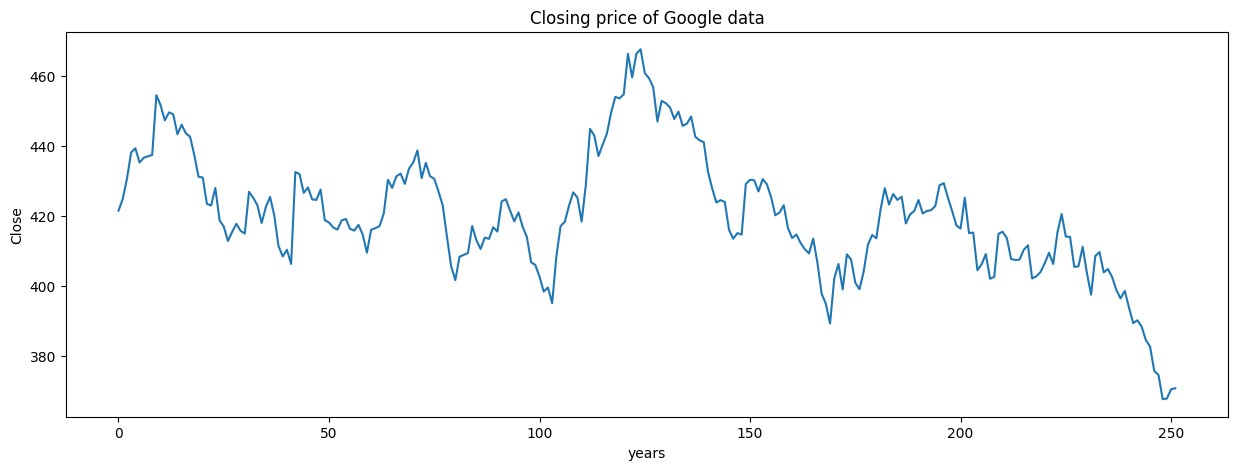

In [32]:
plt.figure(figsize = (15,5))
stock['Close'].plot()
plt.xlabel("years")
plt.ylabel("Close")
plt.title("Closing price of Google data")